# Assignment 1

## Deficiencies of the graphic

The graphic given shows three visualizations of the given data. It aims on emphasizing that users using pseudonyms for their accounts contribute more often to an online community than those who are anonymous or carrying their real names. However one of the visualizations targets quality issues by giving insights if the comments provided by each group are mainly positive or negative written. Since this information is not mentioned again in the conclusion part, it is too present in the paper and should be placed elsewhere. It is placed in the center of the paper on the left side, that's the main attraction point for the reader.

The information about the contribution in percentage or average comments is the most important and should be represented side by side in the center of the paper, to attract the reader's attention. Unfortunately, the chart type for representing the percentage of comments is highly confusing. The rules by Stephen Few tell us to avoid visual effects in our graphs because the more dimension we add we start to underestimate the data presented. Keeping that in mind, we can see that the 3D visualization compared with the perspective does not show the data in an objective, optimal way. Moreover, Pie Charts should be designed in a circle presenting the idea of shares that add up to one whole. The Pie used on the paper is a text bubble and not a circle, which makes it hard for readers to graphically assume 50% of an oval shape with a tip on the bottom. By using Pie Charts, we must use the radius of the circle to show the different segments of our Pie charts. The chart in the paper just sliced the Pie with straight lines and uses the volume of the bubble to present the percentages. All segments are different in width and height which makes it hard for the reader to justify the data visualization.

The data-ink ratio is not the strongest as well. To start with the 3D representation we need a lot of ink to draw shadow and light. We have different color tones for each segment but we only represent three values, therefore we are encouraged to use three colors as well. The representation of the average comments per user looks more like an illustration used to design the brochure. Here we see a 2D environment, where characters are grouped by their identity and care a certain amount of text bubbles over their heads. It is not clear what the number of bubbles means because in each group we see three characters, so are these the average amount of comments for one or three users in each group? When I first saw the brochure I only recognized the text describing the data and not the graph representing it because it is full of sophisticated illustrations and design elements.

## Re-Design

In [60]:
#pip install matplotlib

In [41]:
import matplotlib.pyplot as plt
import numpy as np

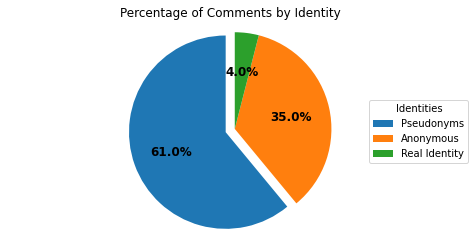

In [42]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Pseudonyms', 'Anonymous', 'Real Identity'
sizes = [61, 35, 4]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'Pseudonymss')

fig1, ax1 = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))


wedges, texts, autotexts = ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops=dict(color="black", style="normal", size="large"))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Percentage of Comments by Identity")

ax1.legend(wedges, labels,
          title="Identities",
          loc="center left",
          bbox_to_anchor=(0.8, 0, 0, 1))

plt.setp(autotexts, weight="bold")

plt.show()

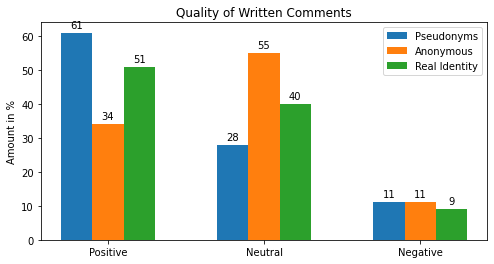

In [51]:
labels = ['Positive', 'Neutral', 'Negative']
pseudo = [61, 28, 11]
ano = [34, 55, 11]
real = [51, 40, 9]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(x - 0.2, pseudo, width, label='Pseudonyms')
rects2 = ax.bar(x, ano, width, label='Anonymous')
rects3 = ax.bar(x + 0.2, real, width, label='Real Identity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount in %')
ax.set_title('Quality of Written Comments')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)



plt.show()

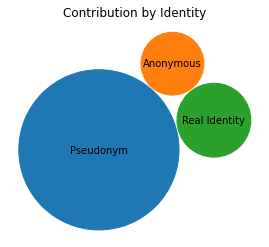

In [59]:
browser_market_share = {
    'browsers': ['Pseudonym', 'Real Identity', 'Anonymous'],
    'market_share': [65, 13.83, 10],
    'color': ['#1F77B4', '#2CA02C', '#FF7F0E']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Contribution by Identity')

plt.show()